# Bike Demand Analysis and Modelling

### Data Quality checks

In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [650]:
day=pd.read_csv("day.csv") #reading the data

In [651]:
day.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


from the above we can understand that few categorical variables are considered as int type (ex:weekday), we need to handle them in our analysis

In [652]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values are present in our data

In [653]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Using describe function to look into the statistics of data

In [654]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


we can remove instant column,dteday column as the info from dte is captured in mnth,yr,weekday

In [655]:
day.drop("instant",axis=1,inplace=True)


In [656]:
day.drop("dteday",axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [657]:
day['season'] = day['season'].astype("category")
day['mnth'] = day['mnth'].astype("category")
day['weekday'] = day['weekday'].astype("category")
day['weathersit'] = day['weathersit'].astype("category")

###### converted the season, mnth, weekday, weathersit to categorical variables as they are not int type, we will be creating dummy variables for these column in later stage.
we did not convert holiday,yr,workingday because they have only 0,1 and when again we try to convert them using dummy they will be represented as same (so avoiding that)

In [658]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(6)
memory usage: 61.0 KB


# Visualising 

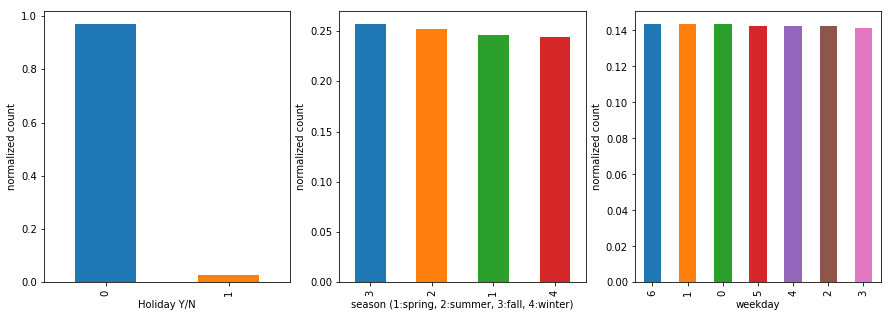

In [659]:

plt.figure(figsize=(15,5))
plt.subplot(131)
day["holiday"].value_counts(normalize=True).plot.bar()
plt.ylabel('normalized count')
plt.xlabel('Holiday Y/N')
plt.subplot(132)
day["season"].value_counts(normalize=True).plot.bar()
plt.ylabel('normalized count')
plt.xlabel('season (1:spring, 2:summer, 3:fall, 4:winter)')
plt.subplot(133)
day["weekday"].value_counts(normalize=True).plot.bar()
plt.ylabel('normalized count')
plt.xlabel('weekday')
plt.show()

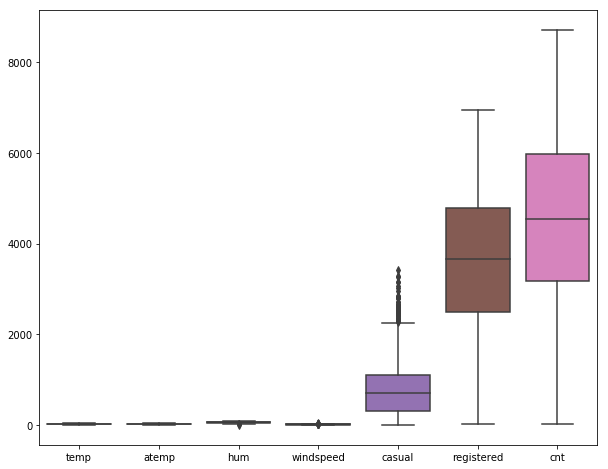

In [660]:
plt.figure(figsize=(10,8))
sns.boxplot(data=day[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

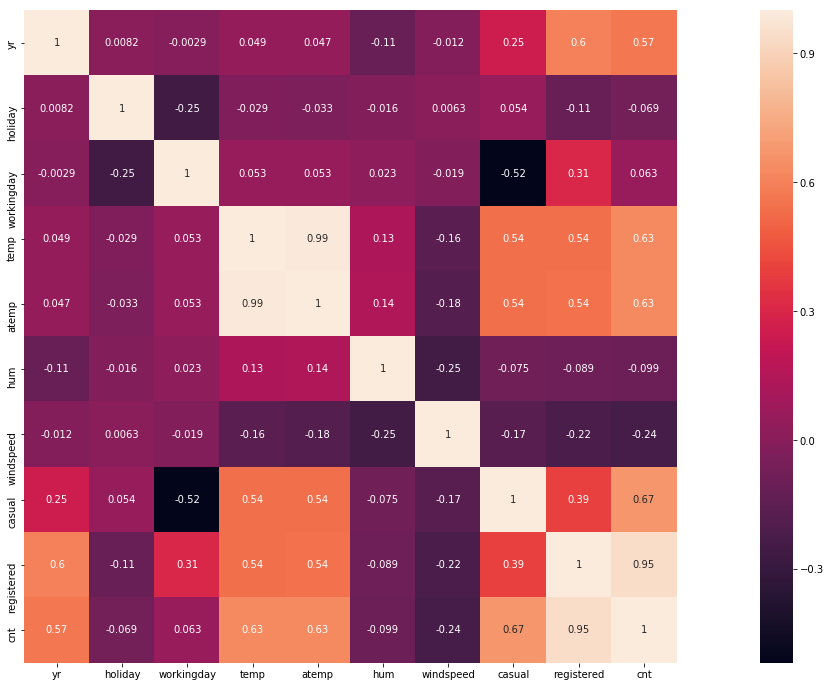

In [661]:
plt.figure(figsize=(30,12))
sns.heatmap(data=day.corr(),square=True,annot=True,cbar=True)
plt.show()

# INFERENCES FROM THE ABOVE HEATMAP


1.self realtion i.e. of a feature to itself is equal to 1 as expected.

2.temp and atemp are highly related as expected.

3.humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4.also note that casual and working day are highly inversely related as you would expect.

5.Also note that count and holiday are highly inversely related as you would expect.

6.Also note that temp(or atemp) highly effects the count.

7.Also note that weather and count are highly inversely related. This is bcoz for of our data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

8.registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

9.similarly we can draw some more inferences like weather and humidity and so on

# Data preperation

In [662]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(6)
memory usage: 61.0 KB


Removing casual and registered columns, as our target variable is cnt and cnt is addition of casual,registered(logically if both the variables are provided well ahead cnt is automatically calculated so , in order to make our model prediction model we should train without those columns

In [663]:
day.drop(['casual','registered'],axis=1,inplace=True)

### Dummy variables

In [664]:
temp = pd.get_dummies(day['season'])

In [665]:
temp.columns=["1:spring", "2:summer", "3:fall", "4:winter"]

In [666]:
temp.head()

,1:spring,2:summer,3:fall,4:winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now, you don't need 4 columns. You can drop the 1:spring column, as the type of season can be identified with just the last three columns where —

000 will correspond to spring,
100 will correspond to summer,
010 will correspond to fall,
001 will correspond to winter

In [667]:
temp=pd.get_dummies(day['season'], drop_first = True)

In [668]:
temp.columns=["2:summer", "3:fall", "4:winter"]

In [669]:
day=pd.concat([day,temp],axis=1)

In [670]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,4:winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [671]:
day.drop("season", axis = 1, inplace = True)

In [672]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,4:winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [673]:
temp=pd.get_dummies(day["weathersit"])

In [674]:
temp.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [675]:
#In the data there is no value as 4 so dummy variables are created for 1,2,3 . In order to preserve category 4 in our model 
# we will consider 000 as 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [676]:
temp.columns=["weathersit_1","weathersit_2","weathersit_3"]

In [677]:
temp.head()

,weathersit_1,weathersit_2,weathersit_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [678]:
day=pd.concat([day,temp],axis=1)

In [679]:
day.drop("weathersit",axis=1,inplace=True)

In [680]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,4:winter,weathersit_1,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [681]:
temp=pd.get_dummies(day["mnth"],drop_first=True)

In [682]:
temp.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [683]:
temp.columns=["oct","nov","dec","feb","mar","apr","may","jun","jul","aug","sep"]

In [684]:
temp.head()

,oct,nov,dec,feb,mar,apr,may,jun,jul,aug,sep
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [685]:
day=pd.concat([day,temp],axis=1)

In [686]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,nov,dec,feb,mar,apr,may,jun,jul,aug,sep
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [687]:
day.drop("mnth",axis=1,inplace=True)

In [688]:
temp=pd.get_dummies(day["weekday"],drop_first=True)

In [689]:
temp.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [690]:
temp.columns=["day_1","day_2","day_3","day_4","day_5","day_6"]

In [691]:
temp.head()

,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [692]:
day=pd.concat([day,temp],axis=1)

In [693]:
day.drop("weekday",axis=1,inplace=True)

In [694]:
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,...,jun,jul,aug,sep,day_1,day_2,day_3,day_4,day_5,day_6
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [695]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,...,jun,jul,aug,sep,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [696]:
day.isnull().sum() #No null values

yr              0
holiday         0
workingday      0
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
2:summer        0
3:fall          0
4:winter        0
weathersit_1    0
weathersit_2    0
weathersit_3    0
oct             0
nov             0
dec             0
feb             0
mar             0
apr             0
may             0
jun             0
jul             0
aug             0
sep             0
day_1           0
day_2           0
day_3           0
day_4           0
day_5           0
day_6           0
dtype: int64

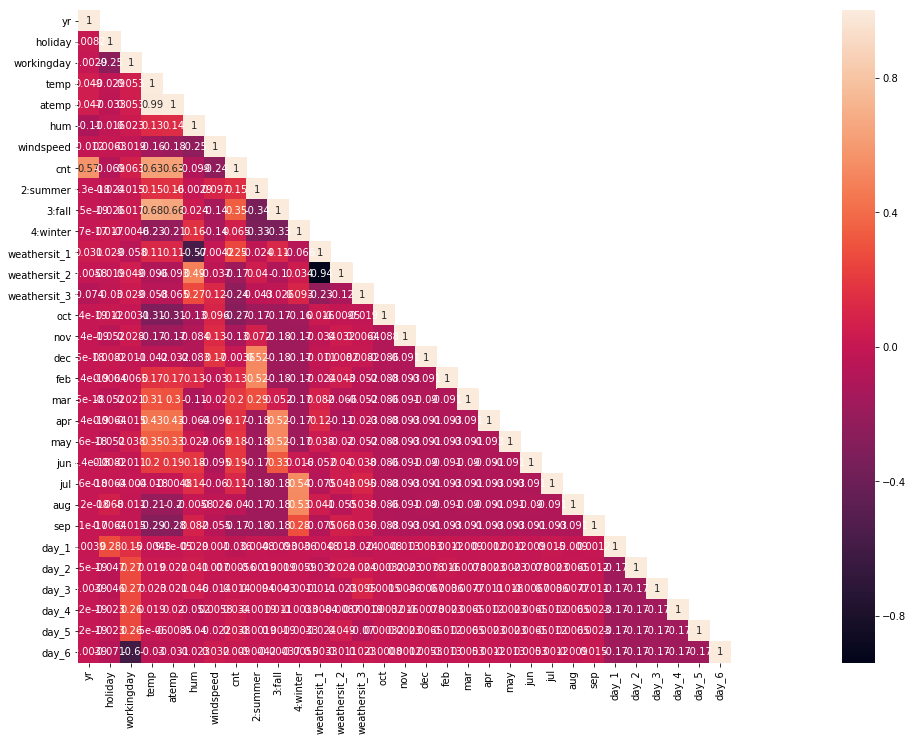

In [697]:
cor_mat= day[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
plt.show()

######  Data quality checks are done , categorical variables are handled, Few visualisations and inferences are captured, Dummy variables are introduced and handled , Unncessary columns are deleted, Proper labelling of columns is done, cnt is already derived from casual and registered users, so we removed both the columns (in this way handling of derived variables is done)

# Splitting the Data into Training and Testing Sets

In [698]:
from sklearn.model_selection import train_test_split 

In [699]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the features

we will use Min-Max Scaling

In [700]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,...,jun,jul,aug,sep,day_1,day_2,day_3,day_4,day_5,day_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1


Creating y_train as target variable and x_train from which y_train will be derived

In [701]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building Model 1

In [702]:
import statsmodels.api as sm
#we started our model with temp as in the inference above we observed temp column and atemp column are highly correlated with cnt
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [703]:
print(lr.params)
lr.summary()

const    0.169798
temp     0.639952
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           5.80e-61
Time:                        12:45:39   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.P-value is 0, that means the significance of this variable is good 

2.R-Squared value is also good for this model, just with one column is able to explain variance 

3.But definitely with more columns being added model can be improved

###### let's go ahead and add all other variables and lets do top down approach of removing unncessary variables 

# Building Model 2- In this model we will add all feautures and go top down approach with next  next models

In [704]:
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()

In [705]:
lr.params

const           0.052281
yr              0.232208
holiday        -0.042394
workingday      0.043879
temp            0.401322
atemp           0.050628
hum            -0.151812
windspeed      -0.184388
2:summer        0.086796
3:fall          0.048580
4:winter        0.153968
weathersit_1    0.123336
weathersit_2    0.062306
weathersit_3   -0.133361
oct             0.030389
nov             0.063853
dec             0.062565
feb             0.087257
mar             0.060862
apr             0.023289
may             0.078641
jun             0.144371
jul             0.070260
aug             0.020783
sep             0.016994
day_1          -0.009946
day_2          -0.007753
day_3           0.005823
day_4           0.001806
day_5           0.011556
day_6           0.054533
dtype: float64

In [706]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          8.42e-181
Time:                        12:45:45   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0523      0.027      1.969      0.050       0.000       0.104
yr               0.2322      0.008     28.792      0.000       0.216       0.248
holiday         -0.0424      0.024     -1.793      0.074      -0.089       0.004
workingday       0.0439      0.009      4.689      0.000       0.025       0.062
temp             0.4013      0.142      2.821      0.005       0.122       0.681
atemp            0.0506      0.138      0.366      0.714      -0.221       0.322
hum             -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed       -0.1844      0.026     -7.003      0.000      -0.236      -0.133
2:summer         0.0868      0.024      3.679      0.000       0.040       0.133
3:fall           0.0486      0.030      1.618      0.106      -0.010       0.108
4:winter         0.1540      0.026      5.932      0.000       0.103       0.205
weathersit_1     0.1233      0.009     13.938      0.000       0.106       0.141
weathersit_2     0.0623      0.012      5.335      0.000       0.039       0.085
weathersit_3    -0.1334      0.022     -5.971      0.000      -0.177      -0.089
oct              0.0304      0.021      1.474      0.141      -0.010       0.071
nov              0.0639      0.022      2.857      0.004       0.020       0.108
dec              0.0626      0.034      1.864      0.063      -0.003       0.129
feb              0.0873      0.036      2.412      0.016       0.016       0.158
mar              0.0609      0.039      1.556      0.120      -0.016       0.138
apr              0.0233      0.044      0.529      0.597      -0.063       0.110
may              0.0786      0.042      1.873      0.062      -0.004       0.161
jun              0.1444      0.037      3.853      0.000       0.071       0.218
jul              0.0703      0.034      2.041      0.042       0.003       0.138
aug              0.0208      0.033      0.633      0.527      -0.044       0.085
sep              0.0170      0.027      0.641      0.522      -0.035       0.069
day_1           -0.0099      0.010     -1.023      0.307      -0.029       0.009
day_2           -0.0078      0.011     -0.695      0.488      -0.030       0.014
day_3            0.0058      0.011      0.554      0.580      -0.015       0.026
day_4            0.0018      0.011      0.165      0.869      -0.020       0.023
day_5            0.0116      0.011      1.031      0.303      -0.010       0.034
day_6            0.0545      0.015      3.757      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:    

In [707]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
27,day_4,inf
28,day_5,inf
24,day_1,inf
1,holiday,inf
26,day_3,inf
25,day_2,inf
2,workingday,inf
3,temp,67.120000
4,atemp,56.090000
10,weathersit_1,37.780000


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

We can see VIF and p-values are very high for day_1, day2, ...,day_5 so it is ideal that days are being highly correlated with some other variables , lets drop all of them (ideally it is better to drop one by one but in this case , lets evaluate with R-squared after dropping all the days

Note: I dropped individually also and checked how R-square is changing, there is no big difference, so in order to have concise notebook dropping all the days at a time and will look into R-Squared value, if there is big difference in R-Squared then I should drop individually, lets see what happens in our next model

In [708]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(["day_1","day_2","day_3","day_4","day_5"], axis=1,inplace=True)

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [709]:
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()

In [710]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.72e-184
Time:                        12:46:07   Log-Likelihood:                 526.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0549      0.026      2.075      0.039       0.003       0.107
yr               0.2316      0.008     28.814      0.000       0.216       0.247
holiday         -0.0494      0.027     -1.817      0.070      -0.103       0.004
workingday       0.0441      0.012      3.833      0.000       0.021       0.067
temp             0.4243      0.141      3.006      0.003       0.147       0.702
atemp            0.0291      0.137      0.212      0.832      -0.241       0.299
hum             -0.1556      0.038     -4.053      0.000      -0.231      -0.080
windspeed       -0.1862      0.026     -7.088      0.000      -0.238      -0.135
2:summer         0.0857      0.024      3.638      0.000       0.039       0.132
3:fall           0.0472      0.030      1.575      0.116      -0.012       0.106
4:winter         0.1517      0.026      5.864      0.000       0.101       0.203
weathersit_1     0.1234      0.009     13.990      0.000       0.106       0.141
weathersit_2     0.0634      0.012      5.475      0.000       0.041       0.086
weathersit_3    -0.1319      0.022     -5.940      0.000      -0.176      -0.088
oct              0.0300      0.021      1.460      0.145      -0.010       0.070
nov              0.0637      0.022      2.852      0.005       0.020       0.108
dec              0.0625      0.033      1.867      0.062      -0.003       0.128
feb              0.0875      0.036      2.422      0.016       0.016       0.158
mar              0.0606      0.039      1.553      0.121      -0.016       0.137
apr              0.0224      0.044      0.510      0.610      -0.064       0.109
may              0.0785      0.042      1.874      0.062      -0.004       0.161
jun              0.1451      0.037      3.879      0.000       0.072       0.219
jul              0.0712      0.034      2.071      0.039       0.004       0.139
aug              0.0224      0.033      0.685      0.494      -0.042       0.087
sep              0.0187      0.026      0.707      0.480      -0.033       0.071
day_6            0.0543      0.014      3.745      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.141   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.885
Skew:                          -0.790   Prob(JB):                     2.99e-53
Kurtosis:                       5.981   Cond. No.                     3.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [711]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,66.24
4,atemp,55.37
10,weathersit_1,37.63
11,weathersit_2,27.29
8,3:fall,11.35
19,may,9.96
18,apr,8.91
9,4:winter,8.17
17,mar,6.86
20,jun,6.76


we can see that Now R-square does not have huge drop so it is ideal to remove those columns and with removal of those columns VIF of working day and holiday has come down drastically, lets focus on temp and atemp as their VIF is very high and p-value of atemp is very high, we will remove atemp

# Building Model-4

In [712]:
X = X_train.drop("atemp", axis=1,inplace=True)
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.49e-185
Time:                        12:47:08   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0549      0.026      2.078      0.038       0.003       0.107
yr               0.2315      0.008     28.847      0.000       0.216       0.247
holiday         -0.0497      0.027     -1.832      0.067      -0.103       0.004
workingday       0.0441      0.011      3.835      0.000       0.022       0.067
temp             0.4526      0.046      9.811      0.000       0.362       0.543
hum             -0.1552      0.038     -4.052      0.000      -0.231      -0.080
windspeed       -0.1874      0.026     -7.305      0.000      -0.238      -0.137
2:summer         0.0858      0.024      3.645      0.000       0.040       0.132
3:fall           0.0470      0.030      1.570      0.117      -0.012       0.106
4:winter         0.1517      0.026      5.872      0.000       0.101       0.203
weathersit_1     0.1235      0.009     14.076      0.000       0.106       0.141
weathersit_2     0.0636      0.012      5.498      0.000       0.041       0.086
weathersit_3    -0.1322      0.022     -5.966      0.000      -0.176      -0.089
oct              0.0301      0.021      1.464      0.144      -0.010       0.070
nov              0.0636      0.022      2.854      0.005       0.020       0.107
dec              0.0627      0.033      1.872      0.062      -0.003       0.128
feb              0.0871      0.036      2.417      0.016       0.016       0.158
mar              0.0600      0.039      1.543      0.124      -0.016       0.136
apr              0.0219      0.044      0.500      0.618      -0.064       0.108
may              0.0777      0.042      1.864      0.063      -0.004       0.160
jun              0.1448      0.037      3.877      0.000       0.071       0.218
jul              0.0712      0.034      2.074      0.039       0.004       0.139
aug              0.0225      0.033      0.688      0.492      -0.042       0.087
sep              0.0188      0.026      0.712      0.477      -0.033       0.071
day_6            0.0543      0.014      3.749      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.792   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.467
Skew:                          -0.788   Prob(JB):                     6.07e-53
Kurtosis:                       5.972   Cond. No.                     3.04e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [713]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_1,37.60
10,weathersit_2,27.28
7,3:fall,11.33
18,may,9.87
17,apr,8.88
8,4:winter,8.17
3,temp,7.09
16,mar,6.82
19,jun,6.75
6,2:summer,6.70


In [628]:
#with this VIF of temp have come down and R square remained same , so it is good to remove atemp

In [714]:
#We know that high p values should be removed but i went to try removing Weathersit_1 first considering
#very large VIF compared to all other columns

# Building Model -5

In [715]:
X = X_train.drop("weathersit_1", axis=1,inplace=True)
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.49e-185
Time:                        12:48:20   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1785      0.030      5.898      0.000       0.119       0.238
yr               0.2315      0.008     28.847      0.000       0.216       0.247
holiday         -0.0497      0.027     -1.832      0.067      -0.103       0.004
workingday       0.0441      0.011      3.835      0.000       0.022       0.067
temp             0.4526      0.046      9.811      0.000       0.362       0.543
hum             -0.1552      0.038     -4.052      0.000      -0.231      -0.080
windspeed       -0.1874      0.026     -7.305      0.000      -0.238      -0.137
2:summer         0.0858      0.024      3.645      0.000       0.040       0.132
3:fall           0.0470      0.030      1.570      0.117      -0.012       0.106
4:winter         0.1517      0.026      5.872      0.000       0.101       0.203
weathersit_2    -0.0600      0.010     -5.779      0.000      -0.080      -0.040
weathersit_3    -0.2557      0.026     -9.770      0.000      -0.307      -0.204
oct              0.0301      0.021      1.464      0.144      -0.010       0.070
nov              0.0636      0.022      2.854      0.005       0.020       0.107
dec              0.0627      0.033      1.872      0.062      -0.003       0.128
feb              0.0871      0.036      2.417      0.016       0.016       0.158
mar              0.0600      0.039      1.543      0.124      -0.016       0.136
apr              0.0219      0.044      0.500      0.618      -0.064       0.108
may              0.0777      0.042      1.864      0.063      -0.004       0.160
jun              0.1448      0.037      3.877      0.000       0.071       0.218
jul              0.0712      0.034      2.074      0.039       0.004       0.139
aug              0.0225      0.033      0.688      0.492      -0.042       0.087
sep              0.0188      0.026      0.712      0.477      -0.033       0.071
day_6            0.0543      0.014      3.749      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.792   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.467
Skew:                          -0.788   Prob(JB):                     6.07e-53
Kurtosis:                       5.972   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [716]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.87
4,hum,20.58
7,3:fall,15.37
17,may,10.90
8,4:winter,10.88
16,apr,9.58
6,2:summer,8.87
18,jun,7.33
15,mar,7.30
14,feb,7.14


In [717]:
# you can observe after this warning of multi-collinearity is gone , but VIF matrix shows larGE VIF , so model can be still improved
#lets remove april column which has high p value

# Building Model-6

In [718]:
X = X_train.drop("apr", axis=1,inplace=True)
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.46e-186
Time:                        12:49:19   Log-Likelihood:                 526.37
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1794      0.030      5.943      0.000       0.120       0.239
yr               0.2312      0.008     28.940      0.000       0.215       0.247
holiday         -0.0507      0.027     -1.877      0.061      -0.104       0.002
workingday       0.0438      0.011      3.816      0.000       0.021       0.066
temp             0.4662      0.037     12.496      0.000       0.393       0.539
hum             -0.1577      0.038     -4.154      0.000      -0.232      -0.083
windspeed       -0.1873      0.026     -7.306      0.000      -0.238      -0.137
2:summer         0.0902      0.022      4.149      0.000       0.048       0.133
3:fall           0.0559      0.024      2.331      0.020       0.009       0.103
4:winter         0.1558      0.025      6.348      0.000       0.108       0.204
weathersit_2    -0.0597      0.010     -5.767      0.000      -0.080      -0.039
weathersit_3    -0.2552      0.026     -9.765      0.000      -0.306      -0.204
oct              0.0270      0.020      1.379      0.169      -0.011       0.065
nov              0.0573      0.018      3.132      0.002       0.021       0.093
dec              0.0523      0.026      1.992      0.047       0.001       0.104
feb              0.0750      0.027      2.821      0.005       0.023       0.127
mar              0.0442      0.023      1.941      0.053      -0.001       0.089
may              0.0589      0.018      3.237      0.001       0.023       0.095
jun              0.1288      0.019      6.777      0.000       0.091       0.166
jul              0.0612      0.028      2.196      0.029       0.006       0.116
aug              0.0142      0.028      0.504      0.615      -0.041       0.069
sep              0.0125      0.023      0.539      0.590      -0.033       0.058
day_6            0.0543      0.014      3.751      0.000       0.026       0.083
==============================================================================
Omnibus:                       82.185   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.949
Skew:                          -0.778   Prob(JB):                     4.30e-51
Kurtosis:                       5.914   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [719]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,30.17
4,hum,20.26
7,3:fall,9.86
8,4:winter,9.82
6,2:summer,7.59
2,workingday,5.14
5,windspeed,4.46
19,aug,4.44
18,jul,4.39
14,feb,3.90


In [635]:
# lets remove aug, oct, dec as they have high p values
# I actually removed individually and observed P values and VIF , but removing individually did not help
# so for making concise notebook , removing all at a time. The result of model is same as removing
#individually or removing at a time.(This is verified by me)

# Building Model- 7

In [720]:
X = X_train.drop(["aug"], axis=1,inplace=True)
X_train.drop(["oct"], axis=1,inplace=True)
X_train.drop(["dec"], axis=1,inplace=True)

X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          1.66e-188
Time:                        12:50:43   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     490   BIC:                            -922.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.710      0.000       0.138       0.252
yr               0.2313      0.008     28.917      0.000       0.216       0.247
holiday         -0.0503      0.027     -1.874      0.061      -0.103       0.002
workingday       0.0435      0.011      3.782      0.000       0.021       0.066
temp             0.4698      0.037     12.729      0.000       0.397       0.542
hum             -0.1642      0.038     -4.343      0.000      -0.239      -0.090
windspeed       -0.1804      0.025     -7.102      0.000      -0.230      -0.130
2:summer         0.1132      0.015      7.350      0.000       0.083       0.144
3:fall           0.0479      0.023      2.085      0.038       0.003       0.093
4:winter         0.1547      0.015     10.522      0.000       0.126       0.184
weathersit_2    -0.0596      0.010     -5.751      0.000      -0.080      -0.039
weathersit_3    -0.2532      0.026     -9.678      0.000      -0.305      -0.202
nov              0.0336      0.015      2.256      0.025       0.004       0.063
feb              0.0370      0.019      1.938      0.053      -0.001       0.075
mar              0.0166      0.018      0.899      0.369      -0.020       0.053
may              0.0515      0.018      2.902      0.004       0.017       0.086
jun              0.1205      0.017      6.914      0.000       0.086       0.155
jul              0.0476      0.018      2.611      0.009       0.012       0.083
sep             -0.0006      0.016     -0.039      0.969      -0.033       0.031
day_6            0.0528      0.014      3.645      0.000       0.024       0.081
==============================================================================
Omnibus:                       84.095   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.847
Skew:                          -0.798   Prob(JB):                     6.12e-52
Kurtosis:                       5.924   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [721]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.32
4,hum,18.73
7,3:fall,9.03
2,workingday,5.10
5,windspeed,4.05
6,2:summer,3.80
8,4:winter,3.50
9,weathersit_2,2.16
0,yr,2.06
12,feb,1.99


# Building Model-8

###### Note: Before building this model , I have dropped the columns march.sep individually but their p values did not come down, so removing all at a time in this model (Removing individually is verified)

In [336]:
# ALL the columns are removed because of high P values

In [722]:
X_train.drop(["sep"], axis=1,inplace=True)
X_train.drop(["mar"], axis=1,inplace=True)
#X_train.drop(["nov"], axis=1,inplace=True)
#X_train.drop(["holiday"], axis=1,inplace=True)

X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          1.51e-190
Time:                        12:52:55   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1944      0.029      6.711      0.000       0.138       0.251
yr               0.2308      0.008     28.959      0.000       0.215       0.246
holiday         -0.0513      0.027     -1.917      0.056      -0.104       0.001
workingday       0.0434      0.011      3.782      0.000       0.021       0.066
temp             0.4823      0.034     14.209      0.000       0.416       0.549
hum             -0.1671      0.037     -4.464      0.000      -0.241      -0.094
windspeed       -0.1823      0.025     -7.212      0.000      -0.232      -0.133
2:summer         0.1149      0.015      7.530      0.000       0.085       0.145
3:fall           0.0446      0.023      1.971      0.049       0.000       0.089
4:winter         0.1528      0.014     10.968      0.000       0.125       0.180
weathersit_2    -0.0594      0.010     -5.746      0.000      -0.080      -0.039
weathersit_3    -0.2529      0.026     -9.693      0.000      -0.304      -0.202
nov              0.0309      0.014      2.131      0.034       0.002       0.059
feb              0.0304      0.018      1.728      0.085      -0.004       0.065
may              0.0478      0.017      2.777      0.006       0.014       0.082
jun              0.1179      0.017      6.933      0.000       0.085       0.151
jul              0.0462      0.017      2.688      0.007       0.012       0.080
day_6            0.0528      0.014      3.654      0.000       0.024       0.081
==============================================================================
Omnibus:                       83.588   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.804
Skew:                          -0.801   Prob(JB):                     2.07e-50
Kurtosis:                       5.863   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [723]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.83
4,hum,17.60
7,3:fall,8.80
2,workingday,5.09
5,windspeed,4.00
6,2:summer,3.73
8,4:winter,3.14
9,weathersit_2,2.15
0,yr,2.05
16,day_6,1.92


Note: each column is removed individually and checked , here im concising all of them

In [726]:
X_train.drop(["feb"], axis=1,inplace=True)
X_train.drop(["3:fall"], axis=1,inplace=True)
X_train.drop(["nov"], axis=1,inplace=True)
X_train.drop(["holiday"], axis=1,inplace=True)
X_train_lm = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          3.24e-192
Time:                        12:58:30   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
2:summer         0.1039      0.011      9.680      0.000       0.083       0.125
4:winter         0.1348      0.012     11.316      0.000       0.111       0.158
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
may              0.0560      0.016      3.478      0.001       0.024       0.088
jun              0.1255      0.016      7.783      0.000       0.094       0.157
jul              0.0411      0.017      2.403      0.017       0.007       0.075
day_6            0.0529      0.015      3.647      0.000       0.024       0.081
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [727]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,4:winter,2.27
8,weathersit_2,2.14
0,yr,2.03
13,day_6,1.90
6,2:summer,1.83
12,jul,1.62


# Building Model -9

In [728]:
#with the above model-8 all the p values have come down , in this model we will remove hum as it has high
#VIF

In [729]:
X_train.drop(["hum"], axis=1,inplace=True)
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          6.16e-189
Time:                        12:59:06   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961      0.000       0.057       0.132
yr               0.2329      0.008     28.799      0.000       0.217       0.249
holiday         -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday       0.0475      0.012      4.045      0.000       0.024       0.070
temp             0.5099      0.022     23.236      0.000       0.467       0.553
windspeed       -0.1532      0.025     -6.203      0.000      -0.202      -0.105
2:summer         0.1008      0.011      9.226      0.000       0.079       0.122
4:winter         0.1267      0.012     10.544      0.000       0.103       0.150
weathersit_2    -0.0854      0.009     -9.839      0.000      -0.102      -0.068
weathersit_3    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
may              0.0542      0.016      3.305      0.001       0.022       0.086
jun              0.1189      0.016      7.259      0.000       0.087       0.151
jul              0.0371      0.017      2.132      0.033       0.003       0.071
day_6            0.0580      0.015      3.931      0.000       0.029       0.087
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [730]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,4:winter,2.02
5,2:summer,1.82
12,day_6,1.77
11,jul,1.62
9,may,1.59
7,weathersit_2,1.54


# Building Model-10 

Removing holiday as p value of holiday close to 0.05

In [731]:
X_train.drop(["holiday"], axis=1,inplace=True)
#Building third model
X_train_lm = sm.add_constant(X_train)

# Create a first second model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()


C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.86e-189
Time:                        13:00:15   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610      0.000       0.049       0.122
yr               0.2331      0.008     28.734      0.000       0.217       0.249
workingday       0.0555      0.011      5.031      0.000       0.034       0.077
temp             0.5116      0.022     23.259      0.000       0.468       0.555
windspeed       -0.1542      0.025     -6.226      0.000      -0.203      -0.106
2:summer         0.1015      0.011      9.269      0.000       0.080       0.123
4:winter         0.1260      0.012     10.461      0.000       0.102       0.150
weathersit_2    -0.0849      0.009     -9.764      0.000      -0.102      -0.068
weathersit_3    -0.2932      0.025    -11.936      0.000      -0.342      -0.245
may              0.0546      0.016      3.318      0.001       0.022       0.087
jun              0.1172      0.016      7.146      0.000       0.085       0.149
jul              0.0384      0.017      2.198      0.028       0.004       0.073
day_6            0.0662      0.014      4.656      0.000       0.038       0.094
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [732]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,4:winter,1.99
4,2:summer,1.82
11,day_6,1.70
10,jul,1.61
8,may,1.59
6,weathersit_2,1.54


###### Tried removing temp variable , but it brought down the accuracy to 60 % so tried removing windspeed below which brought down VIF of temp  to below 5 , so we can use the model without windspeed and also model with windspeed

# Building Model-11

######  Creating model without windspeed

In [733]:
df1=X_train.copy()
df1.drop(["windspeed"], axis=1,inplace=True)
#Building third model
df1_lm = sm.add_constant(df1)

# Create a first second model
lr2 = sm.OLS(y_train, df1_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.24e-182
Time:                        13:00:55   Log-Likelihood:                 487.41
No. Observations:                 510   AIC:                            -950.8
Df Residuals:                     498   BIC:                            -900.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0220      0.016      1.368      0.172      -0.010       0.054
yr               0.2317      0.008     27.551      0.000       0.215       0.248
workingday       0.0565      0.011      4.939      0.000       0.034       0.079
temp             0.5348      0.022     23.793      0.000       0.491       0.579
2:summer         0.0968      0.011      8.542      0.000       0.075       0.119
4:winter         0.1357      0.012     10.954      0.000       0.111       0.160
weathersit_2    -0.0831      0.009     -9.221      0.000      -0.101      -0.065
weathersit_3    -0.3073      0.025    -12.109      0.000      -0.357      -0.257
may              0.0587      0.017      3.441      0.001       0.025       0.092
jun              0.1240      0.017      7.308      0.000       0.091       0.157
jul              0.0336      0.018      1.856      0.064      -0.002       0.069
day_6            0.0638      0.015      4.330      0.000       0.035       0.093
==============================================================================
Omnibus:                       77.679   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.172
Skew:                          -0.736   Prob(JB):                     2.55e-48
Kurtosis:                       5.854   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [742]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif["Features"]

2             temp
1       workingday
0               yr
4         4:winter
3         2:summer
9              jul
7              may
10           day_6
5     weathersit_2
8              jun
6     weathersit_3
Name: Features, dtype: object

# We have got two models Model-10 and Model-11 , we will be using both the models for next analysis

# Residual analysis

In [735]:
y_train_cnt = lr.predict(X_train_lm)
#predicting count on training data

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

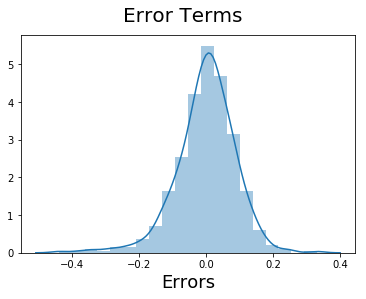

In [736]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

###### The error terms seems to be normally distributed for model-10

In [737]:
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
# we will start testing our model on test data

In [738]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
#preparing test data

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [739]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,...,jun,jul,aug,sep,day_1,day_2,day_3,day_4,day_5,day_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [740]:
df_test.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', '2:summer', '3:fall', '4:winter', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'oct', 'nov', 'dec', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6'],
      dtype='object')

In [743]:
df_test_final=df_test[['yr','workingday','temp','windspeed','2:summer','4:winter','weathersit_2','weathersit_3','may','jun','jul','cnt','day_6']]

In [744]:
y_test = df_test_final.pop('cnt')
X_test = df_test_final
X_test.columns

Index(['yr', 'workingday', 'temp', 'windspeed', '2:summer', '4:winter',
       'weathersit_2', 'weathersit_3', 'may', 'jun', 'jul', 'day_6'],
      dtype='object')

In [745]:
X_test_m = sm.add_constant(X_test) #adding constant

In [746]:
y_pred_m4 = lr.predict(X_test_m)

Text(0,0.5,'y_pred')

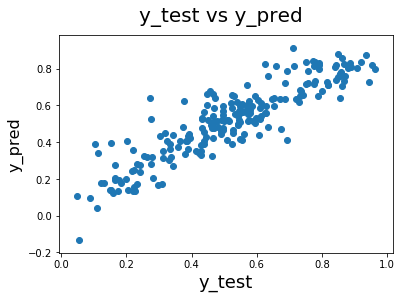

In [747]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [748]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m4)
r_squared = r2_score(y_test, y_pred_m4)

In [749]:
print(r_squared)

0.8024444386146302


# The Rsquared for model-10 is 0.802 which is good

###### We are trying test data on model-11 which does not have winspeed and will check r-squared

In [750]:
X_test_m2=X_test_m.copy()
X_test_m2.drop("windspeed",axis=1,inplace=True)
X_test_m2.columns

Index(['const', 'yr', 'workingday', 'temp', '2:summer', '4:winter',
       'weathersit_2', 'weathersit_3', 'may', 'jun', 'jul', 'day_6'],
      dtype='object')

In [751]:
y_pred_m2 = lr2.predict(X_test_m2)

In [752]:
mse = mean_squared_error(y_test, y_pred_m2)
r_squared = r2_score(y_test, y_pred_m2)

In [753]:
print(r_squared)

0.8055702968717408


In [754]:
# The Model without windspeed is slightly better compared to with windspeed


### The Rsquared for model-11 is 0.805 on test data

### Both Model-10 , Model-11 can be used for predicting the demands

# y_train = df_train.pop('cnt')
#X_train = df_train

# Lets try using RFE model

In [755]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [756]:
df_train_rf, df_test_rf = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [757]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train_rf[num_vars] = scaler.fit_transform(df_train_rf[num_vars])

df_train_rf.head()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2:summer,3:fall,...,jun,jul,aug,sep,day_1,day_2,day_3,day_4,day_5,day_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1


In [758]:
y_train_rf = df_train_rf.pop('cnt')
X_train_rf = df_train_rf
X_train_rf.shape

(510, 30)

In [759]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_rf, y_train_rf)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_rf, y_train_rf)

In [760]:
list(zip(X_train_rf.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2:summer', False, 3),
 ('3:fall', False, 8),
 ('4:winter', True, 1),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('oct', False, 13),
 ('nov', False, 9),
 ('dec', False, 11),
 ('feb', False, 10),
 ('mar', False, 12),
 ('apr', False, 14),
 ('may', False, 5),
 ('jun', False, 2),
 ('jul', False, 6),
 ('aug', False, 15),
 ('sep', False, 16),
 ('day_1', True, 1),
 ('day_2', True, 1),
 ('day_3', True, 1),
 ('day_4', True, 1),
 ('day_5', True, 1),
 ('day_6', False, 4)]

In [761]:
col = X_train_rf.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '4:winter',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5'],
      dtype='object')

In [762]:
X_train_rf.columns[~rfe.support_]

Index(['atemp', '2:summer', '3:fall', 'oct', 'nov', 'dec', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'day_6'],
      dtype='object')

In [763]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_rf[col]
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '4:winter',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5'],
      dtype='object')

In [764]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [765]:
lm = sm.OLS(y_train_rf,X_train_rfe).fit()   # Running the linear model

In [766]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          2.20e-167
Time:                        13:05:42   Log-Likelihood:                 457.31
No. Observations:                 510   AIC:                            -886.6
Df Residuals:                     496   BIC:                            -827.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0793      0.027      2.912   

In [767]:
# we can remove the columns with high p values , that is all day_1,day_2,day_3,day_4,day_5
# but doing so will bring your model similar to model-10, 


### Note: when you look into the model created by LRE model and model 10 , the R-squared value of model-10 is better than LRE model

In [768]:
X_train_rfe = X_train_rf[col]
X_train_rfe.drop(["day_1","day_2","day_3","day_4","day_5"],axis=1,inplace=True)

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [769]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [770]:
lm = sm.OLS(y_train_rf,X_train_rfe).fit() 

In [771]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.5
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          1.25e-171
Time:                        13:05:43   Log-Likelihood:                 456.37
No. Observations:                 510   AIC:                            -892.7
Df Residuals:                     500   BIC:                            -850.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0812      0.027      2.993   

In [772]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,weathersit_1,inf
9,weathersit_2,inf
10,weathersit_3,inf
5,hum,1.850000
4,temp,1.220000
6,windspeed,1.160000
7,4:winter,1.140000
3,workingday,1.070000
2,holiday,1.060000
1,yr,1.030000


In [773]:
# we will drop weathersit_1

In [774]:
X_train_rfe.drop(["weathersit_1"],axis=1,inplace=True)

In [775]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [776]:
lm = sm.OLS(y_train_rf,X_train_rfe).fit() 

In [777]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.5
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          1.25e-171
Time:                        13:05:44   Log-Likelihood:                 456.37
No. Observations:                 510   AIC:                            -892.7
Df Residuals:                     500   BIC:                            -850.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2047      0.030      6.743      0.000       0.145       0.264
yr               0.2283      0.009     25.456      0.000       0.211       0.246
holiday         -0.0847      0.029     -2.927      0.004      -0.142      -0.028
workingday       0.0187      0.010      1.916      0.056      -0.000       0.038
temp             0.6042      0.022     27.864      0.000       0.562       0.647
hum             -0.1411      0.041     -3.422      0.001      -0.222      -0.060
windspeed       -0.1703      0.028     -6.053      0.000      -0.226      -0.115
4:winter         0.1134      0.011     10.377      0.000       0.092       0.135
weathersit_2    -0.0493      0.012     -4.255      0.000      -0.072      -0.027
weathersit_3    -0.2401      0.029     -8.260      0.000      -0.297      -0.183
==============================================================================
Omnibus:                       39.115   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.894
Skew:                          -0.428   Prob(JB):                     2.23e-19
Kurtosis:                       4.819   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [778]:
#we will drop workingday because its p value is high

In [779]:
X_train_rfe.drop(["workingday"],axis=1,inplace=True)

In [780]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train_rf,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     257.4
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          4.66e-172
Time:                        13:05:45   Log-Likelihood:                 454.51
No. Observations:                 510   AIC:                            -891.0
Df Residuals:                     501   BIC:                            -852.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2177      0.030      7.337      0.000       0.159       0.276
yr               0.2287      0.009     25.445      0.000       0.211       0.246
holiday         -0.0973      0.028     -3.440      0.001      -0.153      -0.042
temp             0.6058      0.022     27.881      0.000       0.563       0.648
hum             -0.1419      0.041     -3.433      0.001      -0.223      -0.061
windspeed       -0.1724      0.028     -6.116      0.000      -0.228      -0.117
4:winter         0.1125      0.011     10.280      0.000       0.091       0.134
weathersit_2    -0.0485      0.012     -4.172      0.000      -0.071      -0.026
weathersit_3    -0.2382      0.029     -8.180      0.000      -0.295      -0.181
==============================================================================
Omnibus:                       43.957   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.432
Skew:                          -0.507   Prob(JB):                     3.80e-20
Kurtosis:                       4.783   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [781]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.77
4,hum,1.85
7,weathersit_2,1.55
8,weathersit_3,1.23
3,temp,1.22
5,windspeed,1.16
6,4:winter,1.14
1,yr,1.03
2,holiday,1.01


In [782]:
df_test_final=df_test[['yr','holiday','temp','windspeed','4:winter','weathersit_2','weathersit_3','hum','cnt']]

In [783]:
y_test_lre = df_test_final.pop('cnt')
X_test_lre = df_test_final
X_test_lre.columns

Index(['yr', 'holiday', 'temp', 'windspeed', '4:winter', 'weathersit_2',
       'weathersit_3', 'hum'],
      dtype='object')

Text(0,0.5,'y_pred')

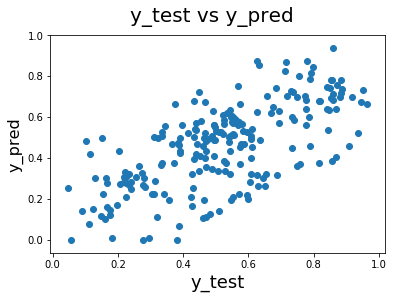

In [784]:
X_test_m_lre = sm.add_constant(X_test_lre)
y_pred_lre = lm.predict(X_test_m_lre)
fig = plt.figure()
plt.scatter(y_test, y_pred_lre)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [785]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lre)
r_squared = r2_score(y_test, y_pred_lre)

In [786]:
print(r_squared)

0.3025553389997204


In [787]:
# This shows that this model has given very poor r2-square on test set when we tried to use LRE model

# Conclusion: Among all the different models tried , Model-10 and Model 11 above had given a good R2-square of 0.802,0.806 on test data

Train R^2 :0.828

Train Adjusted R^2 :0.824

Test R^2 :0.806